<a href="https://www.kaggle.com/code/p4rlxdev/spaceship-titanic-nullzero-fastai-2022?scriptVersionId=120053577" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#Use the Path module to highight
pd.options.display.float_format = '{:.2f}'.format
path = Path('/kaggle/input/spaceship-titanic')

In [3]:
print(path)
df_train = pd.read_csv(path/'train.csv')
df_test = pd.read_csv(path/'test.csv')

/kaggle/input/spaceship-titanic


In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [5]:
df_train['HomePlanet'].unique()



array(['Europa', 'Earth', 'Mars', nan], dtype=object)

Fill all NA Values with the mode across all columns in place


In [6]:
modes = df_train.mode().iloc[0]
modes

PassengerId                0001_01
HomePlanet                   Earth
CryoSleep                    False
Cabin                      G/734/S
Destination            TRAPPIST-1e
Age                          24.00
VIP                          False
RoomService                   0.00
FoodCourt                     0.00
ShoppingMall                  0.00
Spa                           0.00
VRDeck                        0.00
Name            Alraium Disivering
Transported                   True
Name: 0, dtype: object

In [7]:
df_train.fillna(modes, inplace=True)

Doneski!

In [8]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [9]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


Future feature engineering:
- Drop Destination?
- Add 1 to any 0's unless done in the dls


In [10]:
splits = RandomSplitter(seed=42)(df_train)

In [11]:
dls = TabularPandas(
    df_train, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["PassengerId","HomePlanet", "CryoSleep","Cabin"],
    cont_names=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
    y_names="Transported", y_block = CategoryBlock(),
).dataloaders(path=".")

The data and model together make up a Learner. To create one, we say what the data is (dls), and the size of each hidden layer ([10,10]), along with any metrics we want to print along the way:

In [12]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.0831763744354248, valley=0.0063095735386013985)

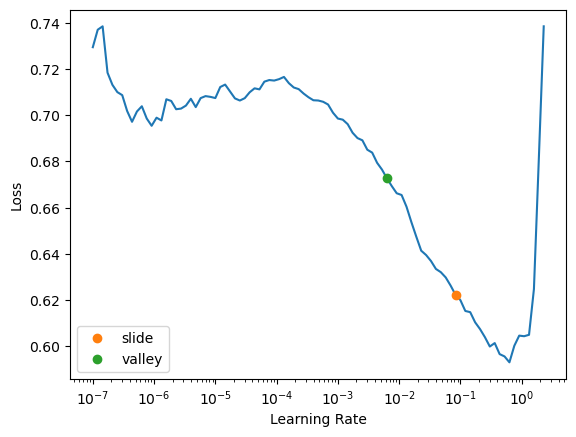

In [13]:
learn.lr_find(suggest_funcs=(slide, valley))

In [14]:
learn.fit(16, lr=0.06)

epoch,train_loss,valid_loss,accuracy,time
0,0.486172,0.481172,0.770426,00:04
1,0.144955,0.551400,0.757192,00:04
2,0.042890,0.846330,0.768700,00:04
3,0.019701,1.095385,0.760644,00:04
4,0.017722,1.401254,0.714039,00:04
5,0.020706,0.646712,0.759494,00:04
6,0.021647,0.775256,0.762946,00:04
7,0.024923,0.705896,0.763521,00:04
8,0.033073,0.750698,0.767549,00:04
9,0.048309,0.645248,0.746835,00:04


In [15]:
df_test = pd.read_csv(path/'test.csv')
df_test['Age'] = df_test.Age.fillna(0)
modes = df_test.mode().iloc[0]
modes



PassengerId              0013_01
HomePlanet                 Earth
CryoSleep                  False
Cabin                    G/160/P
Destination          TRAPPIST-1e
Age                        18.00
VIP                        False
RoomService                 0.00
FoodCourt                   0.00
ShoppingMall                0.00
Spa                         0.00
VRDeck                      0.00
Name            Berta Barnolderg
Name: 0, dtype: object

In [16]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [17]:
df_test.fillna(modes, inplace=True)

Data loader for the test data

In [18]:
dl_test = learn.dls.test_dl(df_test)

In [19]:
preds,_ = learn.get_preds(dl=dl_test)

In [20]:
df_test['Transported'] = (preds[:,1]>0.5).int()
sub_df = df_test[['PassengerId','Transported']]
sub_df.to_csv('sub.csv', index=False)

In [21]:
!head sub.csv

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
PassengerId,Transported
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,0
0027_01,0
0029_01,1
0032_01,1
0032_02,1
